<a href="https://colab.research.google.com/github/jpdeleon/chronos/blob/master/notebooks/examples-contamination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install git+https://github.com/jpdeleon/chronos.git@master

In [1]:
%matplotlib inline
import matplotlib.pyplot as pl
import numpy as np

import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
s = cr.ShortCadence(toiid=837)

Available sectors: [10, 11]
Using sector=10.


In [3]:
#generate custom lightcurve
lc = s.make_custom_lc()


Searching mast for TIC 460205581

2 tpf(s) found in sector(s) [10, 11]
Using data from sector 10 only


Applying data quality mask identified in Data Release Notes (sector 10):
t>1570.8762|t<1581.78453|t>1584.72342

Querying Gaia DR2 catalog for 157.037 -64.5052 within 120.0 arcsec.



In [4]:
#contamination ratio is automatically computed
s.contratio

0.07216446531740872

## contamination
compute flux ratios based on delta magnitude between star within aperture and the brightest star (not necessarily the target)

In [5]:
tpf = s.tpf
mask = s.aper_mask
gaia_sources = s.query_gaia_dr2_catalog(radius=120) 
fluxes = cr.compute_fluxes_within_mask(tpf, mask, gaia_sources)

#flux ratios of stars within aperture (relative to the brightest star)
len(fluxes)

Querying Gaia DR2 catalog for 157.037 -64.5052 within 120.0 arcsec.



49

In [6]:
sum(fluxes)-1 #minus one removes the contribution of brightest star

0.07216446531740872

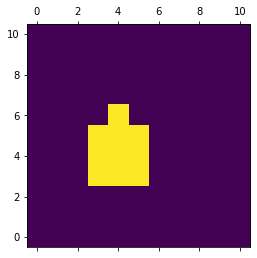

In [7]:
pl.matshow(s.aper_mask, origin='lower')

In [8]:
gaia_sources = s.query_gaia_dr2_catalog(radius=90)
gaiaid = gaia_sources.iloc[0]['source_id']

Querying Gaia DR2 catalog for 157.037 -64.5052 within 90.0 arcsec.



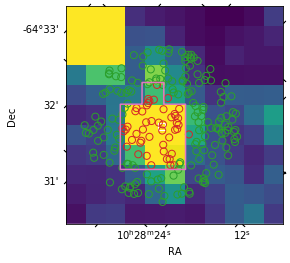

In [9]:
ax = cr.plot_gaia_sources_on_tpf(s.tpf, sap_mask='pipeline',
                                 target_gaiaid=gaiaid, gaia_sources=gaia_sources)

In [10]:
fluxes = cr.compute_fluxes_within_mask(s.tpf, aper_mask=s.aper_mask, gaia_sources=gaia_sources)
contratio = sum(fluxes)-1
print(f'{contratio*100:.2f}%')

7.22%


In [11]:
#compare to TIC contamination ratio
tic_params = s.query_tic_catalog(return_nearest_xmatch=True)
tic_params['contratio']

Querying TIC catalog for 157.037 -64.5052
            within 3.0 arcsec.



0.129885986

In [12]:
tic_params['contratio']-contratio

0.05772152068259129

The ~5% difference may be attributable to the difference of aperture mask used in TIC catalog (is it fixed?) relative to the aperture I used here. 

### varying apertures

mask=pipeline; contratio=0.07
Brightest star is detected near the edges.
Aperture mask is placed at the center instead.

mask=round; contratio=0.13
Brightest star detected is near the edges.
Aperture mask is placed at the center instead.

mask=square; contratio=0.16
mask=threshold; contratio=0.05


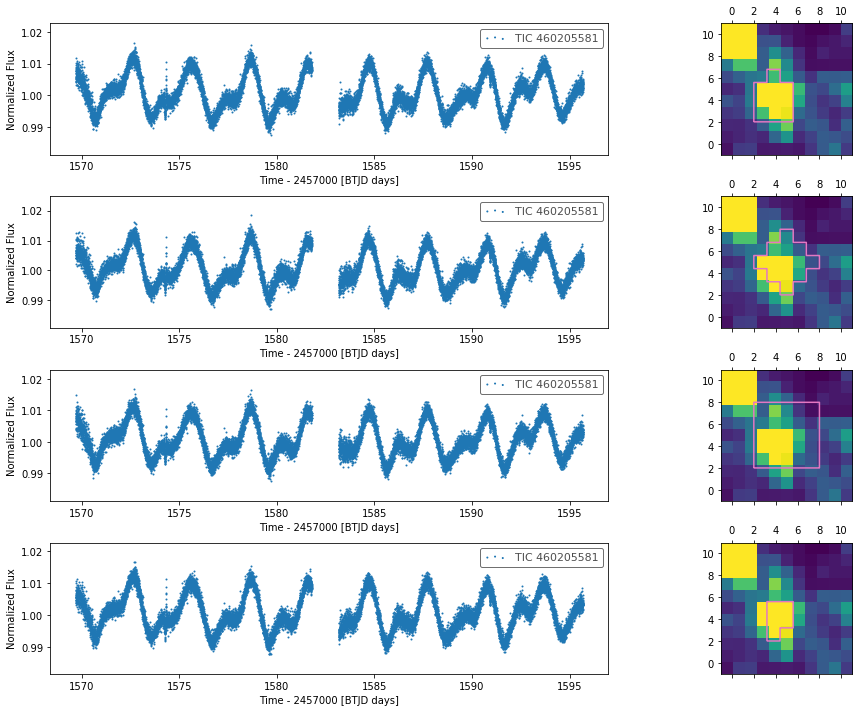

In [20]:
#custom lightcurves with varying apertures
masks = ['pipeline','round','square','threshold']
kwargs = {'aper_radius': 2, 'threshold_sigma': 5}

fig, axs = pl.subplots(len(masks), 2, figsize=(15,10))

tpf = s.tpf
imgwcs = tpf.wcs

lcs={}
for n,sap_mask in enumerate(masks):
    lc = s.make_custom_lc(sap_mask=sap_mask, **kwargs)
    lcs[sap_mask] = lc
    print(f'mask={sap_mask}; contratio={s.contratio:.2f}')
    
    #plot lightcurve
    _ = lc.scatter(ax=axs[n,0])
    
    #plot aperture
    img = np.median(tpf.flux, axis=0)
    _ = cr.plot_aperture_outline(img, mask=s.aper_mask, imgwcs=imgwcs, ax=axs[n,1])
    
fig.tight_layout()

  0%|          | 0/2348 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 28 durations
Searching 17599 data points, 2348 periods from 0.602 to 12.987 days
Using all 8 CPU threads


100%|██████████| 2348/2348 periods | 00:09<00:00
  0%|          | 1/10291 [00:00<25:35,  6.70it/s]

Searching for best T0 for period 5.54886 days


100%|██████████| 10291/10291 [00:02<00:00, 3863.71it/s]
  0%|          | 0/2348 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 28 durations
Searching 17599 data points, 2348 periods from 0.602 to 12.987 days
Using all 8 CPU threads


100%|██████████| 2348/2348 periods | 00:12<00:00
  2%|▏         | 204/10291 [00:00<00:04, 2034.61it/s]

Searching for best T0 for period 5.54886 days


100%|██████████| 10291/10291 [00:02<00:00, 3714.30it/s]
  0%|          | 0/2348 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 28 durations
Searching 17599 data points, 2348 periods from 0.602 to 12.987 days
Using all 8 CPU threads


100%|██████████| 2348/2348 periods | 00:15<00:00
  2%|▏         | 128/8501 [00:00<00:06, 1272.70it/s]

Searching for best T0 for period 0.90488 days


100%|██████████| 8501/8501 [00:03<00:00, 2779.94it/s]
  0%|          | 0/2348 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 28 durations
Searching 17599 data points, 2348 periods from 0.602 to 12.987 days
Using all 8 CPU threads


100%|██████████| 2348/2348 periods | 00:18<00:00
  1%|          | 121/10291 [00:00<00:08, 1204.79it/s]

Searching for best T0 for period 3.91073 days


100%|██████████| 10291/10291 [00:05<00:00, 2028.61it/s]


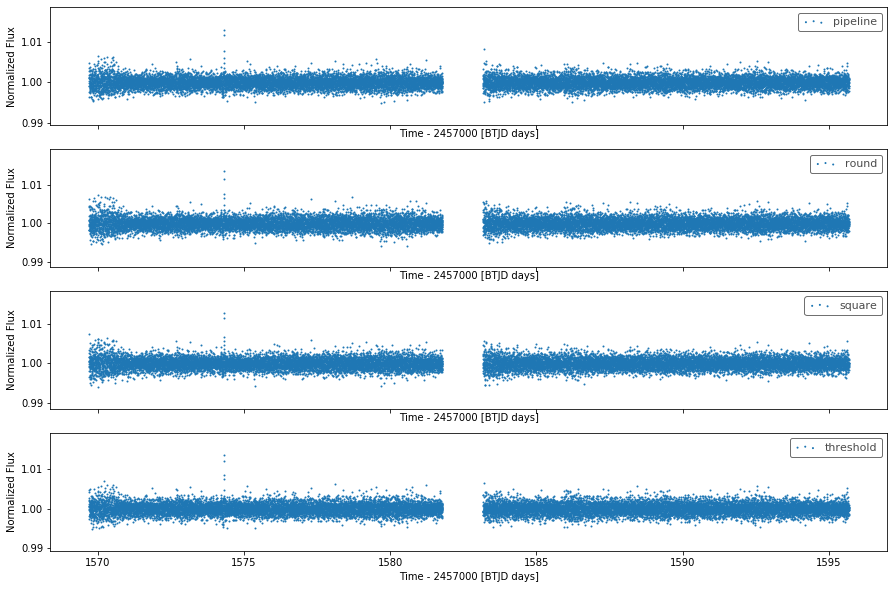

In [25]:
from transitleastsquares import transitleastsquares as tls

masks = lcs.keys()
fig, ax = pl.subplots(len(masks), 1, figsize=(15,10), sharex=True)

flats = {}
tls_results = {}
for n,key in enumerate(masks):
    lc = lcs[key]
    flat = lc.flatten(window_length=101)
    flats[key] = flat
    flat.scatter(ax=ax[n], label=key)
    
    #run tls
    result = tls(flat.time, flat.flux).power()
    
    #correct depth by contamination factor
#     result['depth_corr'] = (1-result['depth'])*(1+s.contratio)
    tls_results[key] = result

In [26]:
period = s.toi_params['Period (days)']
t0 = s.toi_params['Epoch (BJD)']

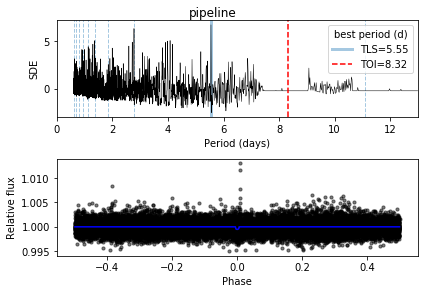

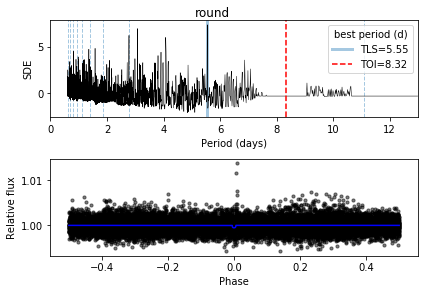

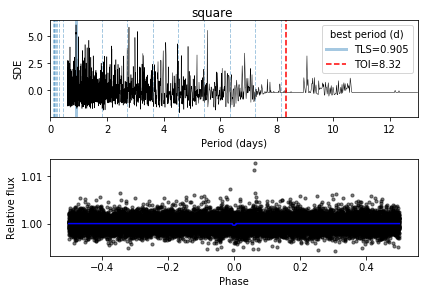

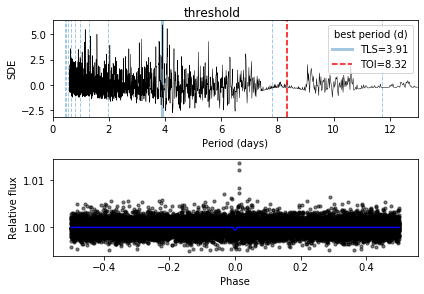

In [31]:
for mask in masks:
    fig = cr.plot_tls(tls_results[mask], period=period, plabel=f'TOI={period:.2f}')
    fig.suptitle(mask, y=1.01)